In [3]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score

from transformers import pipeline

import torch

In [4]:
classifier = pipeline('sentiment-analysis')
type(classifier)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


transformers.pipelines.text_classification.TextClassificationPipeline

In [6]:
classifier("This is a great movie")

[{'label': 'POSITIVE', 'score': 0.9998798370361328}]

In [7]:
classifier([
    "This was a great course",
    "I did not understood any of it"
])

[{'label': 'POSITIVE', 'score': 0.9998300075531006},
 {'label': 'NEGATIVE', 'score': 0.9996486902236938}]

In [9]:
airline_tweets = pd.read_csv("Tweets.csv")
airline_tweets.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [12]:
df = airline_tweets[["airline_sentiment", 'text']]
df.head(5)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


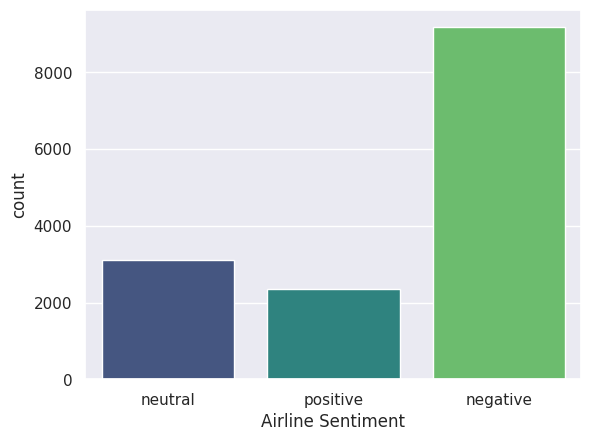

In [14]:
sns.countplot(df, x= 'airline_sentiment', palette = "viridis");
plt.xlabel("Airline Sentiment")
plt.ylabel("count")
plt.show()

In [15]:
df = df[df['airline_sentiment'] != 'neutral']

In [16]:
df['target'] = df['airline_sentiment'].map({'positive': 1, 'negative': 0})

In [17]:
print("number of rows:", df.shape[0])

number of rows: 11541


In [18]:
texts = df['text'].tolist()
predictions = classifier(texts)
predictions[:5]

[{'label': 'POSITIVE', 'score': 0.6070863604545593},
 {'label': 'NEGATIVE', 'score': 0.9973449110984802},
 {'label': 'NEGATIVE', 'score': 0.9995823502540588},
 {'label': 'NEGATIVE', 'score': 0.9854250550270081},
 {'label': 'POSITIVE', 'score': 0.9553208947181702}]

In [24]:
probs = [pred['score'] if pred['label'].startswith('P') else 1 - pred['score'] for pred in predictions]

In [25]:
preds = np.array([1 if pred['label'].startswith('P') else 0 for pred in predictions])

In [27]:
print(f"Accuracy:{round(np.mean(df['target'] ==preds) *100, 2)} %")

Accuracy:88.99 %


In [28]:
cm = confusion_matrix(df['target'], preds, normalize = 'true')

In [38]:
def plot_confusion_matrix(confusion_matrix, labels):
  plt.figure(figsize=(8, 6))
  sns.set(font_scale = 1.4)

  sns.heatmap(confusion_matrix, annot=True, fmt = 'g', cmap ="Blues", xticklabels = labels, yticklabels = labels)
  plt.title("confusion matrix")
  plt.xlabel("predicted")
  plt.ylabel("actual")
  plt.show()

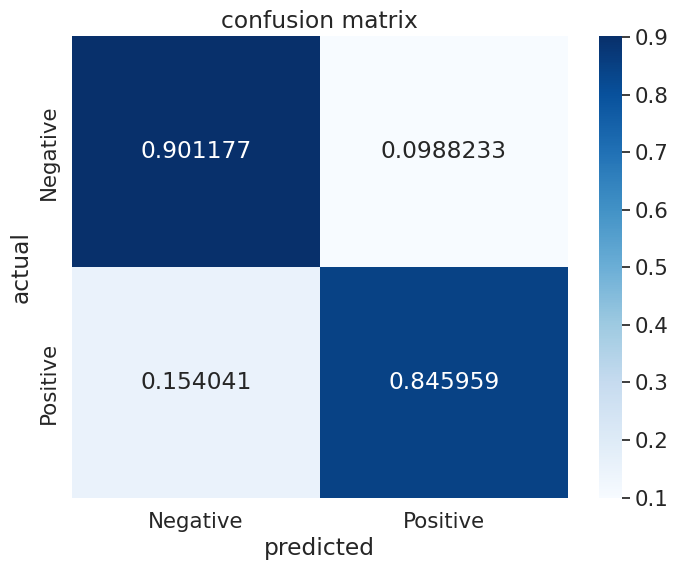

In [39]:
plot_confusion_matrix(cm, ["Negative", "Positive"])

In [40]:
print(f"roc auc score: {roc_auc_score(df['target'], probs)}")

roc auc score: 0.9485934921195112
